In [59]:
from utils.search import *
from utils.data_generator import *
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
%reload_ext autoreload
%autoreload 2
sys.path.append('../')
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils.svm_libsvm import *
from libsvm.svmutil import *
from utils.svm_cvx import *
from utils.kernels import *
import sys
# using SKLEARN library




%reload_ext autoreload
%autoreload 2
sns.set_theme(style='darkgrid')


# Loading Data

In [121]:
#Load Training Data
train_data  = pd.read_csv('train_set.csv',header=None)
train_data.rename(columns={25: 'target'}, inplace=True)
train_data = train_data.astype({'target': int})



X_train = np.array(train_data.iloc[:, :25])
Y_train = np.array(train_data.iloc[:, 25])
Y_train.shape, X_train.shape


((8000,), (8000, 25))

In [122]:
test_data =pd.read_csv('test_set.csv',header=None)
X_test = np.array(test_data)
X_test.shape

(2000, 25)

In [153]:
def plot_graph(cv_results):
        if cv_results is None:
            return

        sns.set_style("darkgrid")
        # plot for Guassian Kernel
        df = pd.DataFrame(cv_results)

        # Plot score Vs C  : linear kernel
        if('linear' in df['param_kernel'].values):

            plt.figure()
            dfl = df.loc[df['param_kernel'] == 'linear']
            ax = sns.lineplot(x=np.log10(
                dfl['param_C']), y=dfl['mean_test_score'], label='test score')
            # ax = sns.lineplot(x=np.log10(
            #     dfl['C']), y=dfl['train_score'], label='train score')
            ax.set_title('Linear Kernel : CVR Score vs C'), ax.set_xlabel(
                '$\log_{10}{C}$')
            # ax.set_ylim(0.8, 1)
            plt.show()

        # Plot C vs gamma
        if('rbf' in df['param_kernel'].values):
            plt.figure()
            ax = sns.heatmap(df.loc[df['param_kernel'] == 'rbf'].pivot('param_C', 'param_gamma', 'mean_test_score'),
                             annot=True, cmap='viridis',fmt='.4g')
            ax.set_title('Gaussian Kernel : Cross Validation Scores')
            ax.set_xlabel('Gamma'), ax.invert_yaxis()
            ax.set_ylabel('C (Regularization strength)')
            plt.show()

        # polynomial kernel :
        if('poly' in df['param_kernel'].values):
            plt.figure()
            ax = sns.heatmap(df.loc[df['param_kernel'] == 'poly'].pivot(
                'param_C', 'param_degree', 'mean_test_score'), annot=True, cmap='viridis', fmt='.4g')
            ax.set_title('Polynomial Kernel : Cross Validation Scores')
            ax.set_xlabel('Degree of kernel'), ax.invert_yaxis()
            ax.set_ylabel('C (Regularization strength)')
            plt.show()


# Prediction -1

In [ ]:
params = [  {'kernel': ['rbf'], 'C':[1e-2, 1e-1, 1e0, 1e1, 1e2], 'gamma':[1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2]}]
grid = GridSearchCV(SVC(), params, verbose=2)
grid.fit(X_train, Y_train)
grid.best_params_


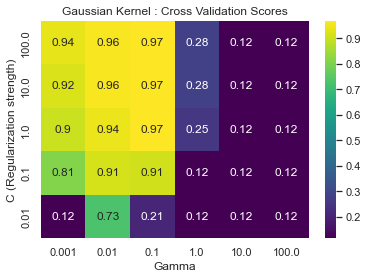

In [23]:

plot_graph(grid.cv_results_)

In [31]:
# params = C=10 gamma =0.1,kernel =rbf
model = SVC(C=10,gamma=0.1,kernel='rbf')
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)


SVC(C=10, gamma=0.1)

# Prdiction-2

In [ ]:
params = [  {'kernel': ['rbf'], 'C':[1e0,1e1,1e2,1e3], 'gamma':[ 1e-2,5e-2, 1e-1,5e-1]}]
grid = GridSearchCV(SVC(), params, verbose=2)
grid.fit(X_train, Y_train)
grid.best_params_


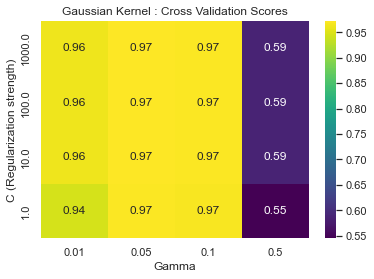

In [67]:
plot_graph(grid.cv_results_)

In [ ]:
# params = C=10 gamma =5e-2,kernel =rbf
model = SVC(C=10,gamma=5e-2,kernel='rbf')
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)


SVC(C=10, gamma=0.1)

# Prediction -3


In [ ]:
params = [{'kernel': ['rbf'], 'C':[ 1e1,2.5e1,5e1,7.5e1, 1e2, 1e3],
           'gamma':[7.5e-2, 5e-2,2.5e-2, 1e-1]}]
grid = GridSearchCV(SVC(), params, verbose=2)
grid.fit(X_train, Y_train)
grid.best_params_


In [ ]:
pd.DataFrame(grid.cv_results_).sort_values('rank_test_score').head(5)

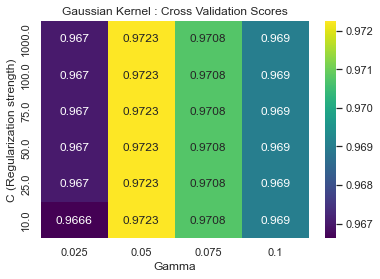

In [83]:

plot_graph(grid.cv_results_)

In [84]:
# params = C=10 gamma =0.1,kernel =rbf
model = SVC(C=25,gamma=0.05,kernel='rbf')
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)


# Prediction -4


In [117]:
gammas = np.linspace(2.5e-2,7.5e-2,6,endpoint=False)
gammas =np.delete(gammas,0)
gammas[3]


0.058333333333333334

In [ ]:
params = [{'kernel': ['rbf'], 'C':[ 1e1,2.5e1,5e1,7.5e1, 1e2],
           'gamma':gammas}]
grid = GridSearchCV(SVC(), params, verbose=2,n_jobs=-1)
grid.fit(X_train, Y_train)
grid.best_params_


In [124]:
pd.DataFrame(grid.cv_results_).sort_values('rank_test_score').head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,3.169183,0.241102,1.559969,0.016259,10.0,0.058333,rbf,"{'C': 10.0, 'gamma': 0.058333333333333334, 'ke...",0.971875,0.975625,0.975,0.970625,0.96875,0.972375,0.002604,1
18,3.046328,0.274657,1.714720,0.194049,75.0,0.058333,rbf,"{'C': 75.0, 'gamma': 0.058333333333333334, 'ke...",0.971875,0.975625,0.975,0.970625,0.96875,0.972375,0.002604,1
8,2.920366,0.072731,1.504071,0.044169,25.0,0.058333,rbf,"{'C': 25.0, 'gamma': 0.058333333333333334, 'ke...",0.971875,0.975625,0.975,0.970625,0.96875,0.972375,0.002604,1
13,2.866745,0.032956,1.488224,0.028066,50.0,0.058333,rbf,"{'C': 50.0, 'gamma': 0.058333333333333334, 'ke...",0.971875,0.975625,0.975,0.970625,0.96875,0.972375,0.002604,1
23,3.109967,0.069770,1.556879,0.030226,100.0,0.058333,rbf,"{'C': 100.0, 'gamma': 0.058333333333333334, 'k...",0.971875,0.975625,0.975,0.970625,0.96875,0.972375,0.002604,1


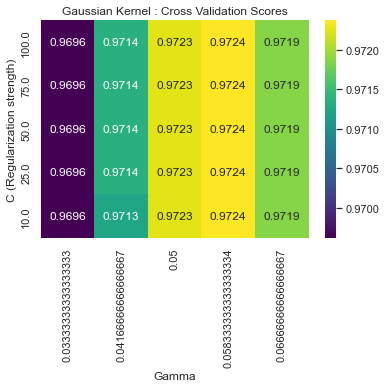

In [125]:

plot_graph(grid.cv_results_)

In [126]:
# params = C=100 gamma =0.05833,kernel =rbf
gamma=gammas[3]
print(gamma)
model = SVC(C=100,gamma=gamma,kernel='rbf')
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)


0.058333333333333334


# Prediction -6


In [141]:
gammas = np.linspace(5e-2, 7.5e-2, 5, endpoint=True)


gammas


array([0.05   , 0.05625, 0.0625 , 0.06875, 0.075  ])

In [ ]:
params = [{'kernel': ['rbf'], 'C':[1e1, 1e2,],
           'gamma':gammas}]
grid = GridSearchCV(SVC(), params, verbose=2.5, n_jobs=-1,cv=5)
grid.fit(X_train, Y_train)
grid.best_params_


In [ ]:
pd.DataFrame(grid.cv_results_).sort_values('rank_test_score').head(5)

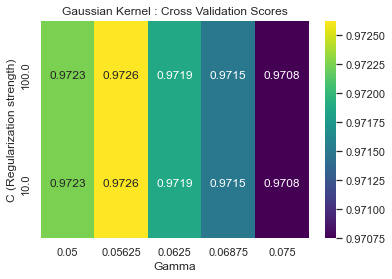

In [147]:

plot_graph(grid.cv_results_)

In [148]:
# params = C=10 gamma =0.05625,kernel =rbf
model = SVC(C=10,gamma=0.05625,kernel='rbf')
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)


# Trying polynomial kernel

In [ ]:
params = [{'kernel': ['poly'], 'C':[1e2,1e3,1e4],
           'degree':[3,4,5,6],
           'coef0':[1e-3,1e-2,1e-1]}]
grid = GridSearchCV(SVC(), params, verbose=2.5, n_jobs=-1,cv=5,scoring='accuracy')
grid.fit(X_train, Y_train)
grid.best_params_


In [ ]:
pd.DataFrame(grid.cv_results_).sort_values('rank_test_score').head(10)

In [166]:

model = SVC(C=10, degree=3,coef0=0.1, kernel='poly')
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)


# Usinng LibSVM


In [183]:
params = [{'kernel': ['rbf'], 'C':[1e1, 1e2, 1e3],
           'gamma':[3,3.05,3.10,3.15,3.20]}]
grid = gridSearchCV_SVM(params, X_train,Y_train)
grid.run()



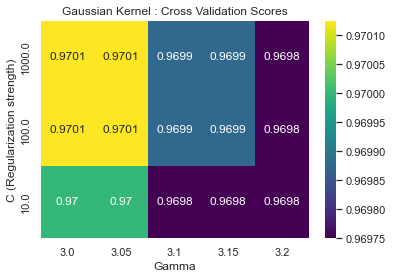

In [184]:
grid.plot_graph()

In [187]:
model = SVM_LIBSVM(C=10, gamma=3, kernel='gaussian')
model.fit(X_train, Y_train)
Y_pred = model.pred(X_test)


# Convert to file

In [189]:
with open('pred3.csv', 'w+') as f:
    f.write('Id,Class\n')
    for i in range (Y_pred.shape[0]):
        if i+1 <1000:
            f.write('{},{:d}\n'.format(str(i+1), int(Y_pred[i])))
        else:
            f.write('\"{:01d},{:03d}\",{:d}\n'.format((i+1)//1000, (i+1) % 1000, int(Y_pred[i])))
